In [3]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

# #1 A Discrete Convolution Program (5 pts)

Write a discrete convolution function `myConv` that convolves two arrays {$f_i, i = 0, \dots , N_f-1$}
and {$w_j, j = 0, \dots , N_w-1$} to obtain an output time series {$g_n$}. For simplicity, assume a fixed sampling interval $\Delta = 1$, and further, that $f$ and $w$ are $0$ outside of their sampled regions. 

 1. How long is {$g_n$}? In other words, how many non-zero points can it have? Justify your answer. 
 2. Please copy and paste your function `g = myConv(f, w)` to the PDF report.
 3. Provide a test to convince yourself (and me) that your function agrees with `numpy.convolve`. For example, generate two random timeseries $f$, $w$ with $N_f=75$, $N_w=150$, drawing each element from $U[0,1]$, and plot the difference between your function's output and numpy's. Include the code for your test in the PDF report.
 4. Compare the speed of your `myConv` function to the NumPy function. Provide a plot of the comparison, and include your python code in the PDF report. Is your function faster or slower than the NumPy function? Can you suggest why that is the case?

_Hint_: For the speed test part, make up your own $f_i$ and $w_j$ time series, and for simplicity, study the cases
of $N_f = N_w = 10, 100, 1000, 10000$. To accurately time each computation of the convolution function, import the
time module and place calls to `time.time` around your code:
```
import time
t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
```
Alternatively, use the `timeit` module:
```
import timeit
print(timeit.timeit('g = myConv(f, w)', number=10000))
```

# #1 Solution

* collaborators  Zed zhou-liu-nauman 
* solution inspired by https://www.youtube.com/watch?v=KuXjwB4LzSA&t=219s&ab_channel=3Blue1Brown around 5:32


## Idea:
We can think of the convolution as the sum of every diagonal (from left to upper right) across the matrix made
by f[i] *w[j] elements

This means practicaly, we assign m = i +j in our nested for-loop, and do a += to add to the sum (starting each con[m] from 0).


1. How long is {$g_n$}? In other words, how many non-zero points can it have? Justify your answer.
answer: {$g_n$} is len(f) + len(w) -1 long, 

In [4]:
def myConv(f, w, dt=1,):
    '''Performs a discrete convolution on arrays f, and w. 
    
    Args: 
        f: array-like, float
        
        w: array-like, float
        
    Optional:
        dt: default =1
            time spacing
    
    returns:
        conv: array like, float, size of len(f) + len(w) -1
        '''
    conv = np.zeros(len(f) + len(w) -1)
    for i in range(len(f)):
        for j in range(len(w)):
            m = i + j
            conv[m] += (w[j] *f[i] * dt) 
    
    return conv 

Text(250, 1e-14, 'The Y axis scale is on the order of 1e-14\n this is close to the floating point accuracy')

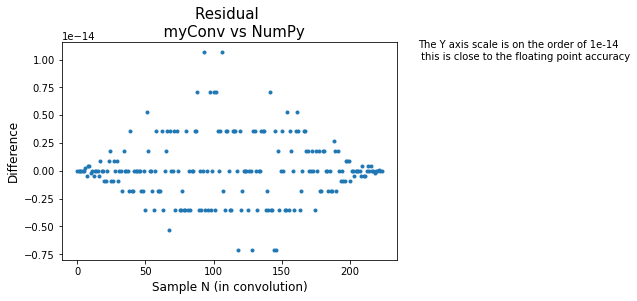

In [18]:
np.random.seed(42)
f_size = 75
w_size = 150
f = np.random.rand(f_size)
w = np.random.rand(w_size)

g = myConv(f,w)
g2 = np.convolve(f,w)

plt.title("Residual \n  myConv vs NumPy", size=15)
plt.plot(g-g2, '.', )
plt.xlabel('Sample N (in convolution)', size=12)
plt.ylabel('Difference', size=12)
plt.text(250, 1e-14, s='The Y axis scale is on the order of 1e-14\n this is close to the floating point accuracy')

In [59]:
# timing test cell
np.random.seed(42)
f_size = 75
w_size = 150
f = np.random.rand(f_size)
w = np.random.rand(w_size)

t1 = time.time()
g = myConv(f,w)
t2 = time.time()

n_sizes = np.logspace(0, 4, 5,)
t_arr1 = np.zeros(len(n_sizes)) # myConv
t_arr2 = np.zeros(len(n_sizes)) # np

for i in range(len(n_sizes)):
    f_size = int(n_sizes[i])
    w_size = f_size
    
    f = np.random.rand(f_size)
    w = np.random.rand(w_size)
    
    t1 = time.time()
    g = myConv(f,w)
    t2 = time.time()
    t_arr1[i] = t2 - t1
    
    t1 = time.time()
    g = np.convolve(f,w)
    t2 = time.time()
    t_arr2[i] = t2 - t1
    

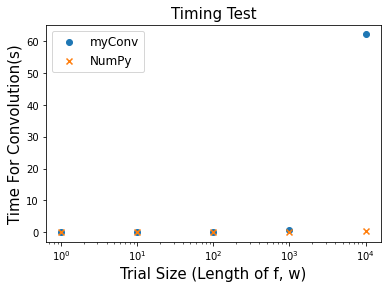

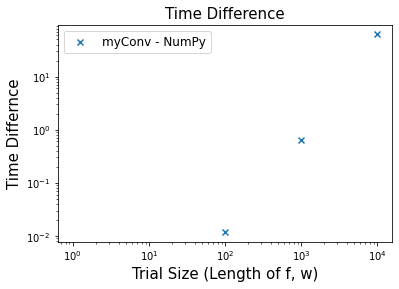

In [54]:
plt.scatter(n_sizes, t_arr1, label='myConv')
plt.scatter(n_sizes, t_arr2, label='NumPy', marker='x')
plt.legend(fontsize=12)
plt.title('Timing Test', size=15)
plt.xlabel('Trial Size (Length of f, w)', size=15)
plt.xscale('log')
plt.ylabel('Time For Convolution(s)', size=15)
plt.show()

#plt.scatter(n_sizes, t_arr1, label='myConv')
plt.scatter(n_sizes, t_arr1 - t_arr2, label='myConv - NumPy', marker='x')
plt.legend(fontsize=12)
plt.title('Time Difference', size=15)
plt.xlabel('Trial Size (Length of f, w)', size=15)
plt.xscale('log')
plt.ylabel('Time Differnce', size=15)
plt.yscale('log')
#plt.ylim(0, 1)

In [58]:
(t_arr1 - t_arr2)

array([-5.24520874e-06, -8.70466232e-04,  1.18184090e-02,  6.35843992e-01,
        6.18975568e+01])

The Numpy method is always faster. For "short" timeseries convolutions, the two methods are comparable in speed. For longer timeseries, the Numpy Method has a substaintial advantage.

This is likely due to the Numpy method using a more sophistated method then a double forloop. C++ or Fortrain stuff etc. 

while it isn't asked, the scipy method is much faster then the numpy method

# Simple Physical System: RL Circuit Response (7 pts)

Consider a simple physical system consisting of a resistor (with resistance `R`) and an inductor (with inductance `L`) in series.  We apply an input voltage $a(t)$ across the pair in series, and measure the output
voltage $b(t)$ across the inductor alone. For this linear system,

 1. Show analytically that its step response (i.e., the $b(t)$ we obtain when the input voltage $a(t) = H(t)$,
    the Heaviside function) is given by

    $$ S(t) = e^{-Rt/L} H(t), $$

    and its impulse response (i.e., the output voltage $b(t)$ when $a(t) = \delta(t)$) is given by

    $$ R(t) = \delta(t) - \frac{R}{L} e^{-Rt/L} H(t). $$

    _Hint_: Construct and solve the ODE relating the voltages under consideration. Consider the two $b(t)$ choices to derive $S(t)$ and $R(t)$. Formulas $\frac{d}{dt} H(t) = \delta(t)$ and $\delta(t) f(t) = \delta(t) f(0)$ may help.
 2. Discretize the impulse response $R(t)$ function, realizing that $H(t)$ should be discretized as

    $$H = [0.5, 1, 1, \dots],$$

    and $\delta(t)$ should be discretized as

    $$D = [1/dt, 0, 0, \dots].$$

    Take advantage of your `myConv` function, or the NumPy built-in function `convolve`, and write
    your own Python function `V_out = RLresponse(R,L,V_in,dt)` to take an input series $V_{in}$ sampled
    at $\Delta = dt$, and calculate the output series $V_{out}$ sampled by the same $dt$. Please paste your
    Python function here (if you are not using a jupyter notebook). (Hint: here $\Delta$ may not be 1, so remember to build the multiplication of
    $\Delta$ into your convolution function.)
 3. Using $R = 1000 \Omega$, $L = 3 H$, and sampling period $dt = 0.25 \text{ ms}$, test your RL-response
    function with {$H_n$} series (discretized $H(t)$) as input, and plot the output time series (as circles) on
    top of the theoretical curve $S(t)$ given by part 1 (as a solid line). Repeat this for {$D_n$} (discretized
    $\delta(t)$) and $R(t)$. Make the time range of the plots 0 to at least 25 ms. Please list your Python
    code here (if you are not using a jupyter notebook).

# Answer

## 1. lets construct the ODE. Recall from our childhood that a RL circuit obeys the following ODE:

$$V = RI + L \frac{dI}{dt}$$

where $V$ is the input voltage (aka $a(t)$), $I$ is the current through the circuit, $R$ and $L$ is the resistance and inductance. 

This is typically solved by rewriting into the norm form and using an integraiting factor:
$$\frac{dI}{dt} + \frac{R}{L}I = \frac{V}{L}$$

with the integrating factor:
$$ e^{\int{\frac{R}{l}dt}} =e^{{\frac{R}{l}}t} $$

Moving into the ODE, this becomes:
$$e^{{\frac{R}{l}}t}\frac{dI}{dt} + e^{{\frac{R}{l}}t}\frac{R}{L}I = e^{{\frac{R}{l}}t}\frac{V}{L}$$

Arrow

$$I e^{\frac{Rt}{L}} = \frac{1}{L} \int{Ve^{\frac{Rt}{L}}dt}$$

We identify $V$ as $a(t)$, and $L \frac{dI}{dt}$ as $b(t)$



### 1a  $V = a(t) = H(t)$

Recall integral table $\int H(t)e^{at}dt = \frac{(e^{at} -1)H(t)}{a}$

So in our case we have $a = \frac{R}{L}$ so the RHS becomes $\frac{1}{L}\frac{(e^{\frac{R}{L}t} -1)H(t)}{\frac{R}{L}}$

The $L$'s cancel:
$$I e^{\frac{Rt}{L}} = \frac{(e^{\frac{R}{L}t} -1)H(t)}{R}$$

Now we can multiply both sides by L and take a time derivative to get $b(t)$, also move the exp term to the right

$$IL e^{\frac{Rt}{L}} = L\frac{(e^{\frac{R}{L}t} -1)H(t)}{R}$$

Arrow

$$IL  = L\frac{(1 -e^{\frac{-Rt}{L}})H(t)}{R}$$

$\frac{d}{dt}$ both sides

$$b(t) = \frac{L}{R} \delta{t} - \frac{L}{R} \delta{t}e^{\frac{-Rt}{L}} - H(t)e^{\frac{Rt}{L}}$$

arrow (the first two terms on the RHS cancel )

$$s(t) = b(t) = - H(t)e^{\frac{Rt}{L}}$$ 

this matches what we were given in the question!


### 1b $V = a(t) = \delta(t) $

Recall:
$$I e^{\frac{Rt}{L}} = \frac{1}{L} \int{Ve^{\frac{Rt}{L}}dt}$$

We identify $V$ as $a(t)$, and $L \frac{dI}{dt}$ as $b(t)$

In our case the RHS is a trivial integral $LHS = 1$, we again multiply by L and move the exp over and take a time derivative

we get:
$

# Convolution of a thermal infrared Spectrum (8 pts)

The Tropospheric Emission Spectrometer (TES) is a Fourier transform spectrometer that was launched by NASA on the Aura spacecraft in July 2004. The instrument measures radiation from the atmosphere in the thermal infrared region of the spectrum. The file `TES_spectra.txt` contains TES measurements on 10 July 2010 from the 2B1 filter on TES. In this spectral region, vertical profiles of atmopsheric temprature and water vapour can be retrieved. (The file contains the spectrum as a function of wavenumbers $\tilde{\nu} = 1/\lambda$ in units of cm$^{-1}$). One way of simulating the spectrum that might be measured by a low-resolution version of TES is by convolving the TES high-resolution spectrum with the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$, where $\Delta$ is a measure of the spectral resolution.

1. Plot the TES spectrum as a function of wavenumber. 
2. Plot the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$ over the interval $\tilde{\nu}=[-3,3]$, with $\Delta \tilde{\nu} = 0.06$ cm$^{-1}$, for values of $\Delta = 1$ and $\Delta =3$.
3.	Use numpy's convolve function to convolve the high-resolution spectrum in the file `TES_Spectra.txt` separately with the two curves in Part 2 (i.e., for $\Delta = 1$ and $\Delta = 3$).
4.	For each of the two cases, plot the original and convolved time series over the wavenumber range $[700,750]$. Comment on the differences in the convolved time series between the two cases.
5. Consider convolving the spectrum with the following Gaussian: $g(\tilde{\nu}) = \frac{1}{\sqrt{\pi}L} e^{-(\tilde{\nu}/L)^2}.$

   Plot The Guassian for $L=0.5$ (over the interval $\tilde{\nu}=[-3,3]$) and the timeseries of the convolution of the TES spectrum with the Gaussian (over the range [700,750]). Comment on the differences between the this convolved time series and those from Part 4.

__Note__

* The spectrum in  `TES_Spectra.txt` is given as a text file with two columns: the first column contains the wavenumber of the measurement (in units of cm$^{-1}$) and the second column has the spectral signal (in Watts cm$^{-2}$ sr$^{-1}$/cm$^{-1}$).
* Use `mode='same'` when calling numpy convolve to truncate the convolution to the max of the supplied arrays (i.e. length of the high-resolution timeseries in our case). This is convenient, since we want to compare the convolution output to the original timeseries.  
* As a check for Parts 4 and 5, ensure that your convolved timeseries is aligned with (or "overlaps") the original timeseries.

array([  200.        ,   420.        ,   662.        ,   928.2       ,
        1221.02      ,  1543.122     ,  1897.4342    ,  2287.17762   ,
        2715.895382  ,  3187.4849202 ,  3706.23341222,  4276.85675344,
        4904.54242879,  5594.99667166,  6354.49633883,  7189.94597271,
        8108.94056999,  9119.83462698, 10231.81808968, 11454.99989865,
       12800.49988852, 14280.54987737, 15908.6048651 , 17699.46535162,
       19669.41188678, 21836.35307545, 24219.988383  , 26841.9872213 ,
       29726.18594343, 32898.80453777, 36388.68499155, 40227.55349071,
       44450.30883978, 49095.33972375, 54204.87369613, 59825.36106574,
       66007.89717232, 72808.68688955, 80289.5555785 , 88518.51113635])

5100.0

In [94]:
# send me $100 on US ard
# facetime opa tomorrow

In [ ]:
# investments for next 10 years
# ENPH, QQQ, lets add a few bonds?
# want a additonal ETF
# want a high paying(?) job for summer
# 